Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



In [1]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 400) # показывать больше строк
pd.set_option('display.max_columns', 30) # показывать больше колонок
stud = pd.read_csv('./stud_math.csv')

load data

In [2]:
stud.info()
stud.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Резюме:
-загрузились 30 столбцов, а в описании 29 - отсутствует описание studytime_granular

-всего 395 записей

2.Первичный анализ данных в столбцах 
Из описания датасета и первичного осмотра видно, что:+

-Числовых рядов - 3 (три): age, absences, score

-Бинарных (два значения) - 12: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

-Оценочные (несколько значений) - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

-Остальные (в том числе Номинальные) (их пока мы не можем отнести к какой-нибудь группе) - 2: school, studytime_granular
проверяем - всего 30 столбцов

In [3]:
print(f'в данных {stud.isnull().any().sum()} колонок имеют неполные данные.')

в данных 27 колонок имеют неполные данные.


In [4]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'fail_res', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']

Разбиваем датасет на выделенные ранее ряды

In [6]:
num_cols = stud[['age', 'absences','score']]
bin_cols = stud[['sex', 'address', 'fam_size', 'p_status','school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
variable_cols = stud[['school', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'fail_res','fam_rel','free_time', 'go_out', 'health']]


Начинаем по порядку. 



count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

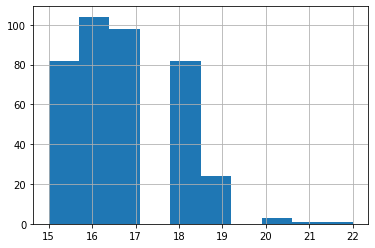

In [44]:
num_cols.age.hist()
num_cols.age.describe()

Возраст - выбросов и анамалий нет, т.к. изначально указан диапозон возрастов и все значения туда укладываются. пропусков нет

In [9]:
num_cols.absences.isna().sum()

12

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

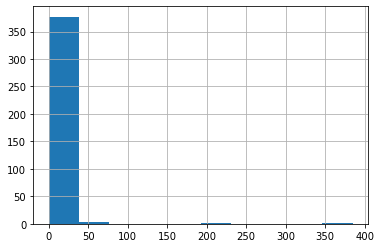

In [10]:
num_cols.absences.hist()
num_cols.absences.describe()

In [11]:
num_cols.absences.unique()
num_cols.absences.value_counts().sort_index()

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

In [12]:
median = num_cols.absences.median()
IQR = num_cols.absences.quantile(0.75) - num_cols.absences.quantile(0.25)
perc25 = num_cols.absences.quantile(0.25)
perc75 = num_cols.absences.quantile(0.75)


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, принят за 30].


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


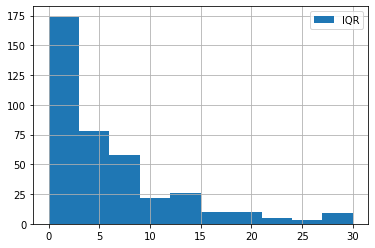

In [13]:
#perc75 + 1.5*IQR  = 30
perc75_new = 30
num_cols.absences = num_cols.absences.apply(lambda x: perc75_new if x >=perc75_new else x)
temp_absences_mean = num_cols.absences.mean()
num_cols.absences = num_cols.absences.apply(lambda x: temp_absences_mean if pd.isna(x) else x)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, принят за {i}].".format(f=perc25 - 1.5*IQR, i = perc75_new))
num_cols.absences.loc[num_cols.absences.between(perc25 - 1.5*IQR, perc75_new)].hist(bins = 10, range = (0, perc75_new), 
                                                                                             label = 'IQR')
plt.legend();


количество пропущенных занятий. пропусков - 12. выбросоми я посчитал все значения больше 30, а не 20 - как это было расчитано межквартильное расстояние, т.к. до 30 все значения встречаются часто и больших пропусков в порядковых значениях нет, а после - следующее значение встречается только через 8 порядковых значений. все значения выбрасов были оставлены и приведены к максимальному значению - 30

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

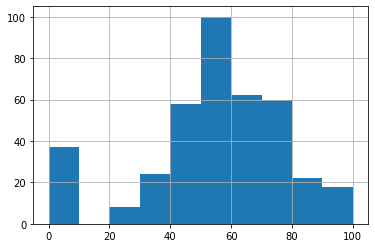

In [14]:
num_cols.score.hist()
num_cols.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, принят за 115.0].


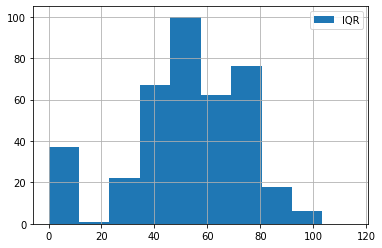

In [15]:
median = num_cols.score.median()
IQR = num_cols.score.quantile(0.75) - num_cols.score.quantile(0.25)
perc25 = num_cols.score.quantile(0.25)
perc75 = num_cols.score.quantile(0.75)
perc75_new = perc75 + 1.5*IQR
temp_absences_mean = num_cols.score.mean()
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, принят за {i}].".format(f=perc25 - 1.5*IQR, i = perc75_new))
num_cols.score.loc[num_cols.score.between(perc25 - 1.5*IQR, perc75_new)].hist(bins = 10, range = (0, perc75_new), 
                                                                                             label = 'IQR')
plt.legend();

In [16]:
num_cols.score.value_counts().sort_index()

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

т.к. все варианты результатов кратны 5, то мы приводим среднее к числу кратному 5 и устанавливаем его для всех неизвестных элементов. элементы равные 0 - оставляем без изменений, т.к. лни находятся в границах выбросов

In [17]:
a = round(num_cols.score.mean())
a = round(a*2/10)/2*10
num_cols.score = num_cols.score.apply(lambda x: a if pd.isna(x) else x)

финальные результаты - пропусков 8, все пропуски заполнены по среднему значению, кратному 5, т.к. все значения кратны 5. 
возможно, пропуски были у учеников еще не сдавших тесты, и тогда потребуется создать дополнительную колонку указывающюю, сдавал ли ученик тест или нет.

значения 0 оставлены и не являются выбросоми, т.к. укладываются в проверку межкварильным расстоянием. 

In [45]:
num_cols.corr()

,age,absences,score
age,1.000000,0.187851,-0.155013
absences,0.187851,1.000000,0.058794
score,-0.155013,0.058794,1.000000


как мы видим из корреляции между значениями и целевой колонкой: возраст обратно коррелирует с уровнем сдачи теста, и так же коррелирует с количеством пропущеных занатий. корреляция между пропусками занатий и тестом - минимальна. 

значение 'age' важное для целевого значения.

In [46]:
bin_cols

,sex,address,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
0,F,U,NaN,A,yes,no,no,no,yes,yes,NaN,no
1,F,U,GT3,NaN,no,yes,no,no,no,yes,yes,no
2,F,U,LE3,T,yes,no,NaN,no,yes,yes,yes,NaN
3,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no
5,M,U,LE3,T,no,yes,yes,yes,yes,yes,yes,no
6,M,NaN,LE3,T,no,no,no,no,yes,yes,yes,no
7,F,U,GT3,A,yes,yes,no,no,yes,yes,no,no
8,M,U,LE3,A,no,yes,yes,no,yes,yes,yes,no
9,M,U,NaN,NaN,no,yes,yes,yes,yes,yes,yes,no


In [19]:
stud.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [20]:
temp = stud.nursery.mode()
temp

0    yes
dtype: object

In [21]:
stud.nursery = stud.nursery.apply(lambda x: temp[0] if pd.isna(x) else x)

In [22]:
stud.address.isna().unique()

array([False,  True])

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

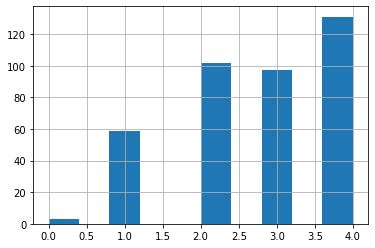

In [23]:
stud.m_edu.hist()
stud.m_edu.describe()

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

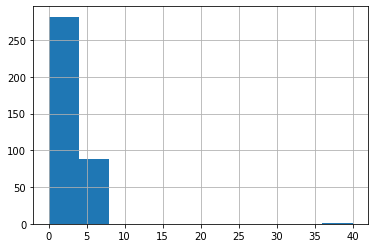

In [24]:
stud.f_edu.hist()
stud.f_edu.describe()

In [25]:
# 40 - выброс **
stud.loc[stud.f_edu > 4, 'f_edu'] = 4

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

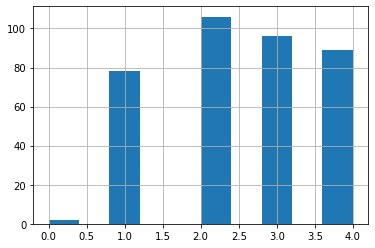

In [26]:
stud.f_edu.hist()
stud.f_edu.describe()

In [27]:
mafa_edu = stud[['m_edu', 'f_edu']].dropna()
mafa_edu.corr()

,m_edu,f_edu
m_edu,1.000000,0.625516
f_edu,0.625516,1.000000


In [28]:
for i in stud.index:
    if stud['f_edu'][i] not in range(0, 4):
        stud['f_edu'][i] = stud['m_edu'][i]
    if stud['m_edu'][i] not in range(0, 4):
        stud['m_edu'][i] = stud['f_edu'][i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
stud.f_edu.isna().unique()

array([False])

In [30]:
stud[['studytime_granular', 'study_time']].corr()

,studytime_granular,study_time
studytime_granular,1.0,-1.0
study_time,-1.0,1.0


In [31]:
#100% corr - stud_time drop
stud.drop(['studytime_granular'], inplace = True, axis = 1)
stud.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,2.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [32]:
stud[stud.address == 'U'].travel_time.median()

1.0

In [33]:
# пустые значения времени в пути заполняем по медиане адреса, пустые адреса - по указанному пути 
# если пусто и то и другое - по медиане принцыпа выбора школы
r_mean_time = stud[stud.address == 'R'].travel_time.median()
u_mean_time = stud[stud.address == 'U'].travel_time.median()
for i in stud[stud.travel_time.isna()].index:
    if stud.loc[i, 'address'] == 'R':
        stud.loc[i, 'travel_time'] = r_mean_time
    elif stud.loc[i, 'address'] == 'U':
        stud.loc[i, 'travel_time'] = u_mean_time
        
for i in stud[stud.address.isna()].index:
    if stud.loc[i, 'travel_time'] >= r_mean_time:
        stud.loc[i, 'address'] = 'R'
    elif stud.loc[i, 'travel_time'] <= u_mean_time:
        stud.loc[i, 'address'] = 'U'
        
for i in stud[(stud.address.isna() & stud.travel_time.isna())].index:
    temp_reason = stud.loc[i, 'reason']
    stud.loc[i, 'address'] = stud[stud.reason == temp_reason].address.mode()[0]
    stud.loc[i, 'travel_time'] = stud[stud.reason == temp_reason].travel_time.median()
    

In [34]:
study_time_mean = round(stud.study_time.mean())
stud.study_time = stud.study_time.apply(lambda x: study_time_mean if pd.isna(x) else x)

In [35]:
fail_res_mean = round(stud.fail_res.mean())
stud.fail_res = stud.fail_res.apply(lambda x: fail_res_mean if pd.isna(x) else x)

In [36]:
absences_mean = round(stud.absences.mean())
stud.absences = stud.absences.apply(lambda x: absences_mean if pd.isna(x) else x)

In [37]:
score_mean = round(stud.score.mean())
stud.score = stud.score.apply(lambda x: score_mean if pd.isna(x) else x)

In [38]:
go_out_mean = round(stud.go_out.mean())
stud.go_out = stud.go_out.apply(lambda x: go_out_mean if pd.isna(x) else x)

In [39]:
stud.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,2.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [40]:
print(f'There are {stud.isnull().any().sum()} columns in dataset with missing values.')

There are 16 columns in dataset with missing values.


In [41]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          395 non-null    int64  
 3   address      395 non-null    object 
 4   fam_size     368 non-null    object 
 5   p_status     350 non-null    object 
 6   m_edu        395 non-null    float64
 7   f_edu        395 non-null    float64
 8   m_job        376 non-null    object 
 9   f_job        359 non-null    object 
 10  reason       378 non-null    object 
 11  guardian     364 non-null    object 
 12  travel_time  395 non-null    float64
 13  study_time   395 non-null    float64
 14  fail_res     395 non-null    float64
 15  school_sup   386 non-null    object 
 16  fam_sup      356 non-null    object 
 17  paid         355 non-null    object 
 18  activities   381 non-null    object 
 19  nursery 

In [42]:
stud.corr()

,age,m_edu,f_edu,travel_time,study_time,fail_res,fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.105599,-0.157983,0.084853,-0.015355,0.228081,0.068899,0.029023,0.134069,-0.065946,0.092241,-0.153481
m_edu,-0.105599,1.000000,0.801292,-0.144454,0.017884,-0.216882,-0.007363,0.016796,0.075678,0.017596,0.006837,0.163117
f_edu,-0.157983,0.801292,1.000000,-0.166053,-0.011408,-0.252957,-0.037596,-0.012235,0.062781,0.005847,0.036913,0.135556
travel_time,0.084853,-0.144454,-0.166053,1.000000,-0.099989,0.068852,-0.004855,-0.021516,0.052532,-0.031102,-0.043010,-0.076461
study_time,-0.015355,0.017884,-0.011408,-0.099989,1.000000,-0.166598,0.045308,-0.120215,-0.051090,-0.079415,-0.026201,0.114074
fail_res,0.228081,-0.216882,-0.252957,0.068852,-0.166598,1.000000,-0.030492,0.094530,0.113649,0.078668,0.056247,-0.328451
fam_rel,0.068899,-0.007363,-0.037596,-0.004855,0.045308,-0.030492,1.000000,0.175743,0.081510,0.077474,-0.081656,0.056801
free_time,0.029023,0.016796,-0.012235,-0.021516,-0.120215,0.094530,0.175743,1.000000,0.293111,0.061575,0.009169,0.018869
go_out,0.134069,0.075678,0.062781,0.052532,-0.051090,0.113649,0.081510,0.293111,1.000000,-0.015029,-0.047745,-0.127048
health,-0.065946,0.017596,0.005847,-0.031102,-0.079415,0.078668,0.077474,0.061575,-0.015029,1.000000,-0.015853,-0.070237


In [43]:
stud

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,2.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,3.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,3.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
